In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# 한글을 쓰면 폰트가 깨지기 때문에 사용할 폰트를 직접 컴퓨터에 있는 폰트로 지정.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# Data Frame 데이터 중 실수형은 소수점 둘째짜리까지만 표현
pd.options.display.float_format='{:.2f}'.format

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
map_df = gpd.read_file("Seoul.shp", encoding = "euc-KR")

map_df.replace(["서울시노원구",'서울시도봉구','서울시성북구'],
              ['노원구', '도봉구','성북구'], inplace=True)
map_df.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [4]:
map_df = map_df.sort_values(by='SGG_NM')
map_df.reset_index(inplace=True, drop = True)
map_df.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
1,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
2,11305,강북구,49,11305,143,"POLYGON ((956313.265 1965176.336, 956401.172 1..."
3,11500,강서구,65,11500,136,"MULTIPOLYGON (((935035.249 1950923.294, 935041..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [7]:
# 1차백신 접종자 수 

df_v1 = pd.read_csv("data/vaccine.csv", header = 0, encoding = 'euc-KR')
df_v1 = df_v1[['행정구','1회차_누적']]
df_v1.columns = ['행정구', '1차접종자']
df_v1.head()


,행정구,1차접종자
0,강남구,285976
1,강동구,258219
2,강북구,179060
3,강서구,320366
4,관악구,257214


In [9]:
# 2차 백신 접종자 수 
df_v2 = pd.read_csv("data/vaccine.csv", header = 0, encoding = 'euc-KR')
df_v2 = df_v2[['행정구','완료_누적']]
df_v2.columns = ['행정구','2차접종자']
df_v2.head()

,행정구,2차접종자
0,강남구,163555
1,강동구,143925
2,강북구,103093
3,강서구,184156
4,관악구,146272


In [41]:
# 확진자 수
df_c = pd.read_csv('data/corona.csv', header = 0, encoding = 'utf-8')
df_c = df_c[['지역','합계']]
df_c.columns = ['행정구','확진자수']
df_c.head()

,행정구,확진자수
0,강남구,38968
1,강동구,19384
2,강북구,13336
3,강서구,18320
4,관악구,27304


In [42]:
# 1차 백신 접종자수와 확진자 수 DF 합치기
merge1 = pd.merge(df_v1,df_c)
merge1.head()

,행정구,1차접종자,확진자수
0,강남구,285976,38968
1,강동구,258219,19384
2,강북구,179060,13336
3,강서구,320366,18320
4,관악구,257214,27304


In [43]:
# 확진자 수 대비 1차 접종자 수 비 구하기

merge1['1차접종비율'] = (merge1['1차접종자']/merge1['확진자수'])
merge1 = merge1[['행정구','1차접종비율']]
merge1.set_index('행정구', inplace = True)
merge1.head()

,1차접종비율
행정구,
강남구,7.34
강동구,13.32
강북구,13.43
강서구,17.49
관악구,9.42


In [44]:
# 2차 백신 접종자수와 확진자 수 DF 합치기 , 확진자 수 대비 2차 접종자 수의 비 구하기
merge2 = pd.merge(df_v2,df_c)
merge2['2차접종비율'] = (merge2['2차접종자']/merge2['확진자수'])
merge2 = merge2[['행정구','2차접종비율']]
merge2.set_index('행정구',inplace = True)
merge2.head()

,2차접종비율
행정구,
강남구,4.20
강동구,7.42
강북구,7.73
강서구,10.05
관악구,5.36


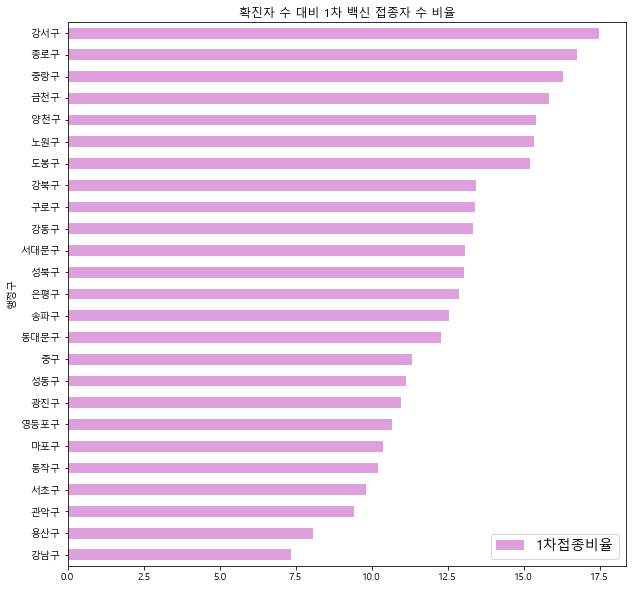

In [46]:
# 가로 막대 그래프로 시각화 (( 1차 백신 접종자비율))

merge1['1차접종비율'].sort_values().plot(kind='barh',color='plum',figsize=(10,10))
plt.title('확진자 수 대비 1차 백신 접종자 수 비율') # 그래프에 타이틀 표기.
plt.legend(loc='best', ncol=1, fontsize=14) # 그래프에 범례 위치, 형식, 그리고 폰트 사이즈 지정.

plt.savefig('시각화/행정구별_1백신-확진(막대).png', dpi=300)
plt.show()

In [ ]:
## 수치가 낮을 수록 확진자 수는 많지만 그에 비해 백신 접종자 수는 적다는 것을 의미
## 따라서 낮은 지역들을 우선적으로 백신 접종 필요

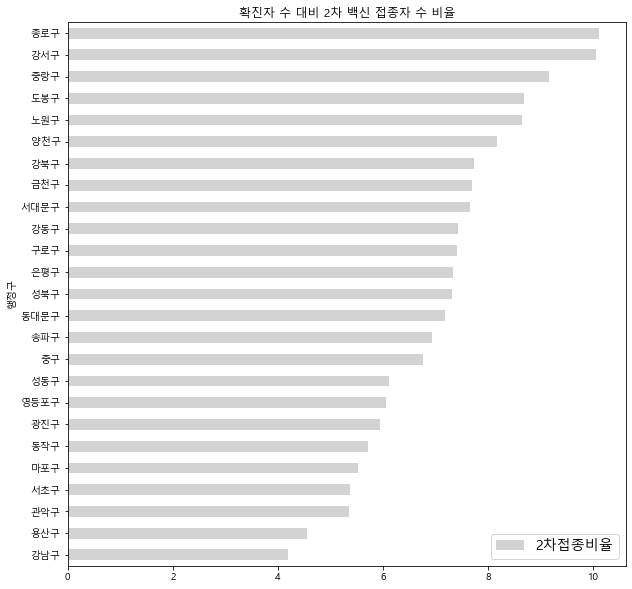

In [47]:
# 가로 막대 그래프로 시각화 (( 2차 백신 접종자비율))

merge2['2차접종비율'].sort_values().plot(kind='barh',color='lightgrey',figsize=(10,10))
plt.title('확진자 수 대비 2차 백신 접종자 수 비율') # 그래프에 타이틀 표기.
plt.legend(loc='best', ncol=1, fontsize=14) # 그래프에 범례 위치, 형식, 그리고 폰트 사이즈 지정.
plt.savefig('시각화/행정구별_2백신-확진(막대).png', dpi=300)
plt.show()

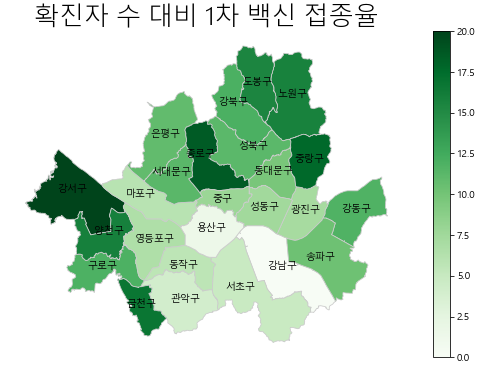

In [36]:
## map 으로 시각화 (1차 접종비율)

# map geoDataFrame과 1차 접종비율 합치기
merge1.reset_index(inplace=True)
finalDF1 = pd.merge(map_df, merge1, left_on='SGG_NM',right_on='행정구')

# 시각화 할 column

variable = '1차접종비율'

# choropleth 범위 설정

vmin, vmax = 0, 20

# figure, axes 생성

fig, ax = plt.subplots(1, figsize = (10, 6))

finalDF1.plot(column = variable, cmap = 'Greens', linewidth = 0.8, ax = ax, 
           edgecolor = '0.8')

# 지도에 행정구명 표시
finalDF1['coords'] = finalDF1['geometry'].apply(lambda x: x.representative_point().coords[:])
finalDF1['coords'] = [coords[0] for coords in finalDF1['coords']]
for idx, row in finalDF1.iterrows():
    plt.annotate(s=row['행정구'], xy=row['coords'],
                horizontalalignment='center', color='black')


ax.axis('off') # 축 제거

# title

ax.set_title('확진자 수 대비 1차 백신 접종율', fontdict = {'fontsize':'25','fontweight':'3'})

# 출처 

# ax.annotate('Source: data.Seoul. 2021', xy = (0.1, .08),
#           xycoords = 'figure fraction', horizontalalignment='left',
#           verticalalignment='top',fontsize=12,color='#555555')

# 우측에 범위 표시

sm = plt.cm.ScalarMappable(cmap = "Greens", norm = plt.Normalize(vmin = vmin, vmax = vmax))

sm._A = []
cbar = fig.colorbar(sm)

fig.savefig("시각화/행정구별_1백신-확진.png", dpi = 300)

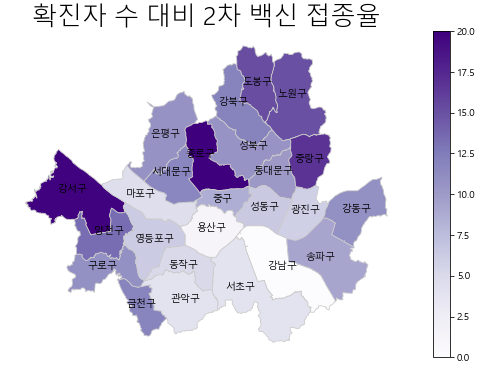

In [37]:
## map 으로 시각화 (2차 접종비율)

# map geoDataFrame과 2차 접종비율 합치기
merge2.reset_index(inplace=True)
finalDF2 = pd.merge(map_df, merge2, left_on='SGG_NM',right_on='행정구')

# 시각화 할 column

variable = '2차접종비율'

# choropleth 범위 설정

vmin, vmax = 0, 20

# figure, axes 생성

fig, ax = plt.subplots(1, figsize = (10, 6))

finalDF2.plot(column = variable, cmap = 'Purples', linewidth = 0.8, ax = ax, 
           edgecolor = '0.8')
# 지도에 행정구명 표시
finalDF2['coords'] = finalDF2['geometry'].apply(lambda x: x.representative_point().coords[:])
finalDF2['coords'] = [coords[0] for coords in finalDF2['coords']]
for idx, row in finalDF2.iterrows():
    plt.annotate(s=row['행정구'], xy=row['coords'],
                horizontalalignment='center', color='black')

ax.axis('off') # 축 제거

# title

ax.set_title('확진자 수 대비 2차 백신 접종율', fontdict = {'fontsize':'25','fontweight':'3'})

# 출처 

# ax.annotate('Source: data.Seoul. 2021', xy = (0.1, .08),
#           xycoords = 'figure fraction', horizontalalignment='left',
#           verticalalignment='top',fontsize=12,color='#555555')

# 우측에 범위 표시

sm = plt.cm.ScalarMappable(cmap = "Purples", norm = plt.Normalize(vmin = vmin, vmax = vmax))

sm._A = []
cbar = fig.colorbar(sm)

fig.savefig("시각화/행정구별_2백신-확진.png", dpi = 300)